In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

In [2]:
func1 = ss.norm(loc=3.0,scale=0.5)
x = np.arange(0.5,10.0,0.02)
y1 = func1.pdf(x)*20000./0.25*0.1
func2= ss.norm(loc=5.0,scale=0.35)
y2 = func2.pdf(x)*40000./0.35*0.1


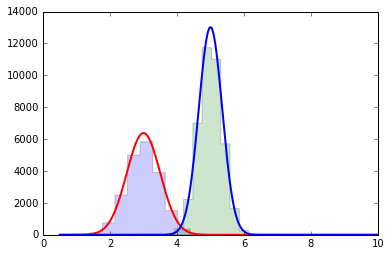

In [3]:
samples1 = np.array(func1.rvs(size=20000))
samples2 = np.array(func2.rvs(size=40000))
plt.hist(samples1, normed=False, histtype='stepfilled', alpha=0.2)
plt.hist(samples2, normed=False, histtype='stepfilled', alpha=0.2)
plt.plot(x,y1,lw=2,c='r')
plt.plot(x,y2,lw=2,c='b')

In [4]:
bigsample = np.append(samples1,samples2)
print len(bigsample)

60000


In [5]:
smallgrid=np.zeros([60000,len(y1)])
for i in range(20000):
    smallgrid[i,:] = y1
for i in range(20000,60000):
    smallgrid[i,:] = y2
approx_pdf = qp.Ensemble(smallgrid.shape[0],gridded=(x,smallgrid))

made the pool of 4 in 0.0623679161072
made the catalog in 122.718238115


In [6]:
testme = inmet.EvaluateMetric(approx_pdf,bigsample)

In [7]:
testPIT = testme.PIT()

In [8]:
ks_stat,ks_pval = testme.KS(using='gridded',dx=0.0001)

In [9]:
print ks_stat
print ks_pval

0.00265728452701
0.78956502173


In [10]:
cvm_stat,cvm_pval = testme.CvM(using='gridded',dx=0.0001)
print cvm_stat
print cvm_pval

0.0513794073338
0.867859453451


In [11]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.01,vmax=0.99)
print ad_stat
print ad_pval

now with proper uniform range
0.36740855471
0.88034108617


change vmin,vmax, see effect

In [12]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.005,vmax=0.995)
print ad_stat
print ad_pval

now with proper uniform range
0.353218731994
0.893515473165


In [13]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.001,vmax=0.999)
print ad_stat
print ad_pval

now with proper uniform range
0.331464031915
0.912790359342


In [14]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.0001,vmax=0.9999)
print ad_stat
print ad_pval

now with proper uniform range
0.323428609292
0.919578277939


In [18]:
ad_stat,ad_pval = testme.AD(using='gridded',dx=0.0001, vmin=0.000,vmax=1.0)
print ad_stat
print ad_pval

now with proper uniform range
0.322971105248
0.919958810636


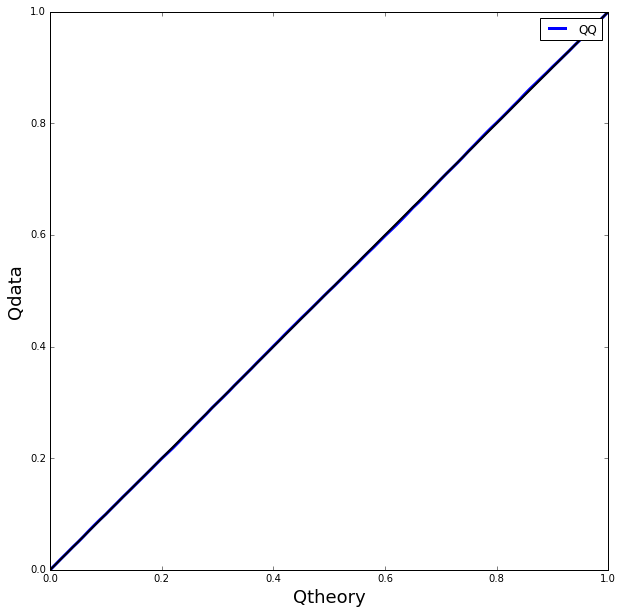

In [16]:
qqplot = testme.QQplot(using='gridded',dx=0.0001,Nquants=101)